In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import itertools as it
import collections
import matplotlib
matplotlib.use('agg')
from matplotlib import pyplot as plt

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [71]:
def make_scatter(x, y, title = None, xlabel = None, ylabel = None, filename = None):
    '''
    This function generates scatter plot of a pair of vectors x and y, and save to file
    Inputs:
      x, y: data vectors
      title:    title of the plot
      xlabel:   label on x-axis
      ylabel:   label on y-axis
      filename: name of the image file (if given, save to file)
    Side effect:
      save an image file if filename is given
    '''
    
    import matplotlib
    matplotlib.use('agg')
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(x, y)
    
    if(xlabel != None):
        ax.set_xlabel(xlabel)
    if(ylabel != None):
        ax.set_ylabel(ylabel)
    if(title != None):
        ax.set_title(title)
    if(filename != None):
        fig.savefig(filename)

In [72]:
ld_file = '/share/PI/mrivas/ukbb/download/chr20impv1.ld'

In [73]:
!head $ld_file

 CHR_A         BP_A                               SNP_A  CHR_B         BP_B                               SNP_B           R2 
    20        61070                         rs555594325     20        61429                                   .      0.24002 
    20        61098                           rs6078030     20        61138                         rs552482647       0.4365 
    20        61450                         rs551073389     20        61538                         rs536670517            1 
    20        63733                          rs75670495     20        63808                          rs76004960            1 
    20        65900                           rs6053810     20        66370                           rs6054257     0.896612 
    20        71079                           rs6040382     20        71093                           rs6040395     0.646209 
    20        72464                         rs537658124     20        72863                         rs544824061       

In [77]:
#ld_df = pd.read_csv(ld_file, delimiter='\s+', nrows=10)
ld_df = pd.read_csv(ld_file, delimiter='\s+')

In [78]:
ld_df['BP_diff'] = ld_df['BP_B'] - ld_df['BP_A']

In [79]:
ld_df.head()

,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2,BP_diff
0,20,61070,rs555594325,20,61429,.,0.240020,359
1,20,61098,rs6078030,20,61138,rs552482647,0.436500,40
2,20,61450,rs551073389,20,61538,rs536670517,1.000000,88
3,20,63733,rs75670495,20,63808,rs76004960,1.000000,75
4,20,65900,rs6053810,20,66370,rs6054257,0.896612,470


# data process
1. take pair of SNPs with >= R^2
1. For each left SNP, take the furtherest SNPs

In [80]:
LD_block_df = ld_df[ld_df['R2'] >= 0.2].groupby(by = ['BP_A']).agg({'BP_diff' : np.max, 'R2' : np.min})

In [81]:
LD_block_df.head()

,BP_diff,R2
BP_A,,
61070,359,0.240020
61098,40,0.436500
61450,88,1.000000
63733,75,1.000000
65900,470,0.896612


In [82]:
LD_block_ndary = LD_block_df.as_matrix()

In [83]:
LD_block_ndary.shape

(137460, 2)

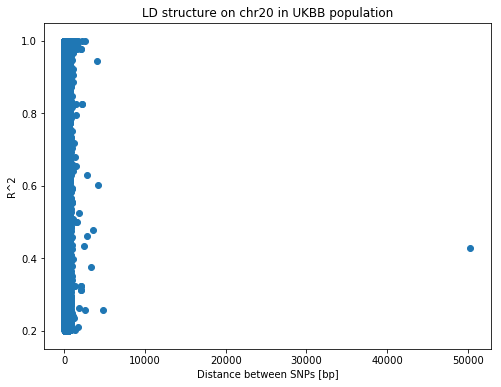

In [84]:
make_scatter(LD_block_ndary[:, 0], LD_block_ndary[:, 1],
             title = 'LD structure on chr20 in UKBB population', 
             xlabel = 'Distance between SNPs [bp]', 
             ylabel = 'R^2',
             filename = './20170420_LD_plot_UKBB.png')

In [89]:
max_dist = 10000

In [90]:
LD_block_ndary[LD_block_ndary[:, 0] <= max_dist, :].shape

(137459, 2)

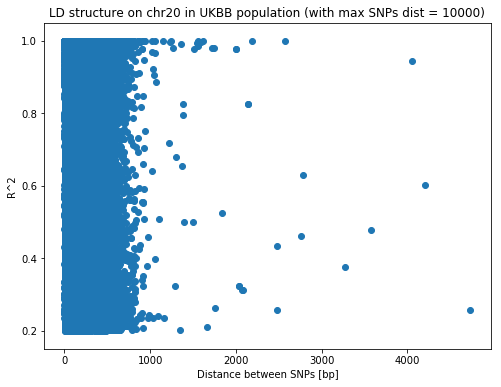

In [93]:
make_scatter(LD_block_ndary[LD_block_ndary[:, 0] <= max_dist, 0], 
             LD_block_ndary[LD_block_ndary[:, 0] <= max_dist, 1],
             title = 'LD structure on chr20 in UKBB population (with max SNPs dist = {})'.format(max_dist), 
             xlabel = 'Distance between SNPs [bp]', 
             ylabel = 'R^2',
             filename = './20170420_LD_plot_UKBB_{}.png'.format(max_dist))

# box plots for each axis

## y-axis

{'boxes': [<matplotlib.lines.Line2D at 0x65079d0>],
 'caps': [<matplotlib.lines.Line2D at 0x64f80d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x64fa210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x64fab90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x65073d0>,
  <matplotlib.lines.Line2D at 0x65072d0>]}

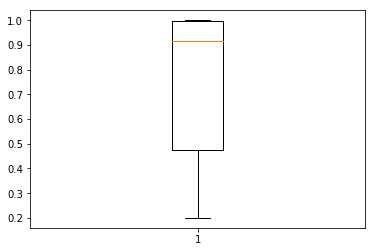

In [95]:
plt.boxplot(LD_block_ndary[:, 1])

## x-axis

{'boxes': [<matplotlib.lines.Line2D at 0x6645650>],
 'caps': [<matplotlib.lines.Line2D at 0x6623990>,
 'fliers': [<matplotlib.lines.Line2D at 0x6640f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x6640e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x6645150>,
  <matplotlib.lines.Line2D at 0x6623910>]}

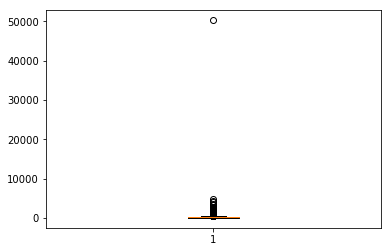

In [94]:
plt.boxplot(LD_block_ndary[:, 0])

{'boxes': [<matplotlib.lines.Line2D at 0x4d3bc90>],
 'caps': [<matplotlib.lines.Line2D at 0x4a7cd90>,
 'fliers': [<matplotlib.lines.Line2D at 0x4d2f310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x4d37810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x4a7c990>,
  <matplotlib.lines.Line2D at 0x4a7c190>]}

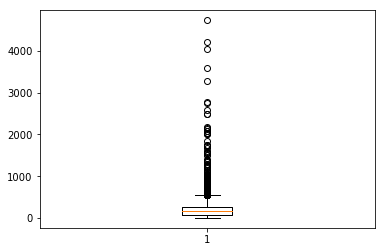

In [96]:
plt.boxplot(LD_block_ndary[LD_block_ndary[:, 0] <= max_dist, 0])

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x6635d10>],
 'caps': [<matplotlib.lines.Line2D at 0x6628c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x662cf10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x662c8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x6635e90>,
  <matplotlib.lines.Line2D at 0x66285d0>]}

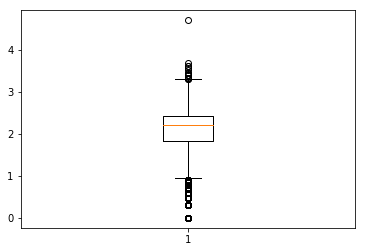

In [98]:
plt.boxplot(np.log(LD_block_ndary[:, 0]) / np.log(10))

/home/ytanigaw/.conda/envs/pgenlib/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


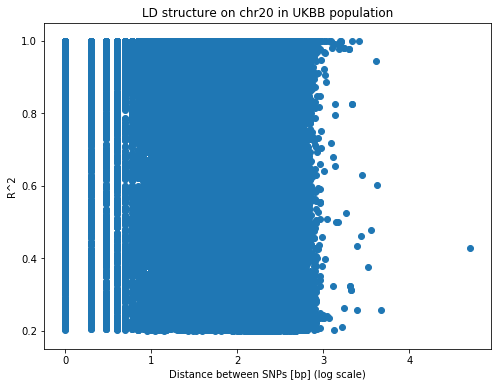

In [99]:
make_scatter(np.log(LD_block_ndary[:, 0]) / np.log(10), LD_block_ndary[:, 1],
             title = 'LD structure on chr20 in UKBB population', 
             xlabel = 'Distance between SNPs [bp] (log scale)', 
             ylabel = 'R^2',
             filename = './20170420_LD_plot_UKBB_log.png')